In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/car data.csv')

In [11]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']


In [15]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [23]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
                                              ('cat', categorical_transformer, categorical_features)])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

clf = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(random_state=42))])

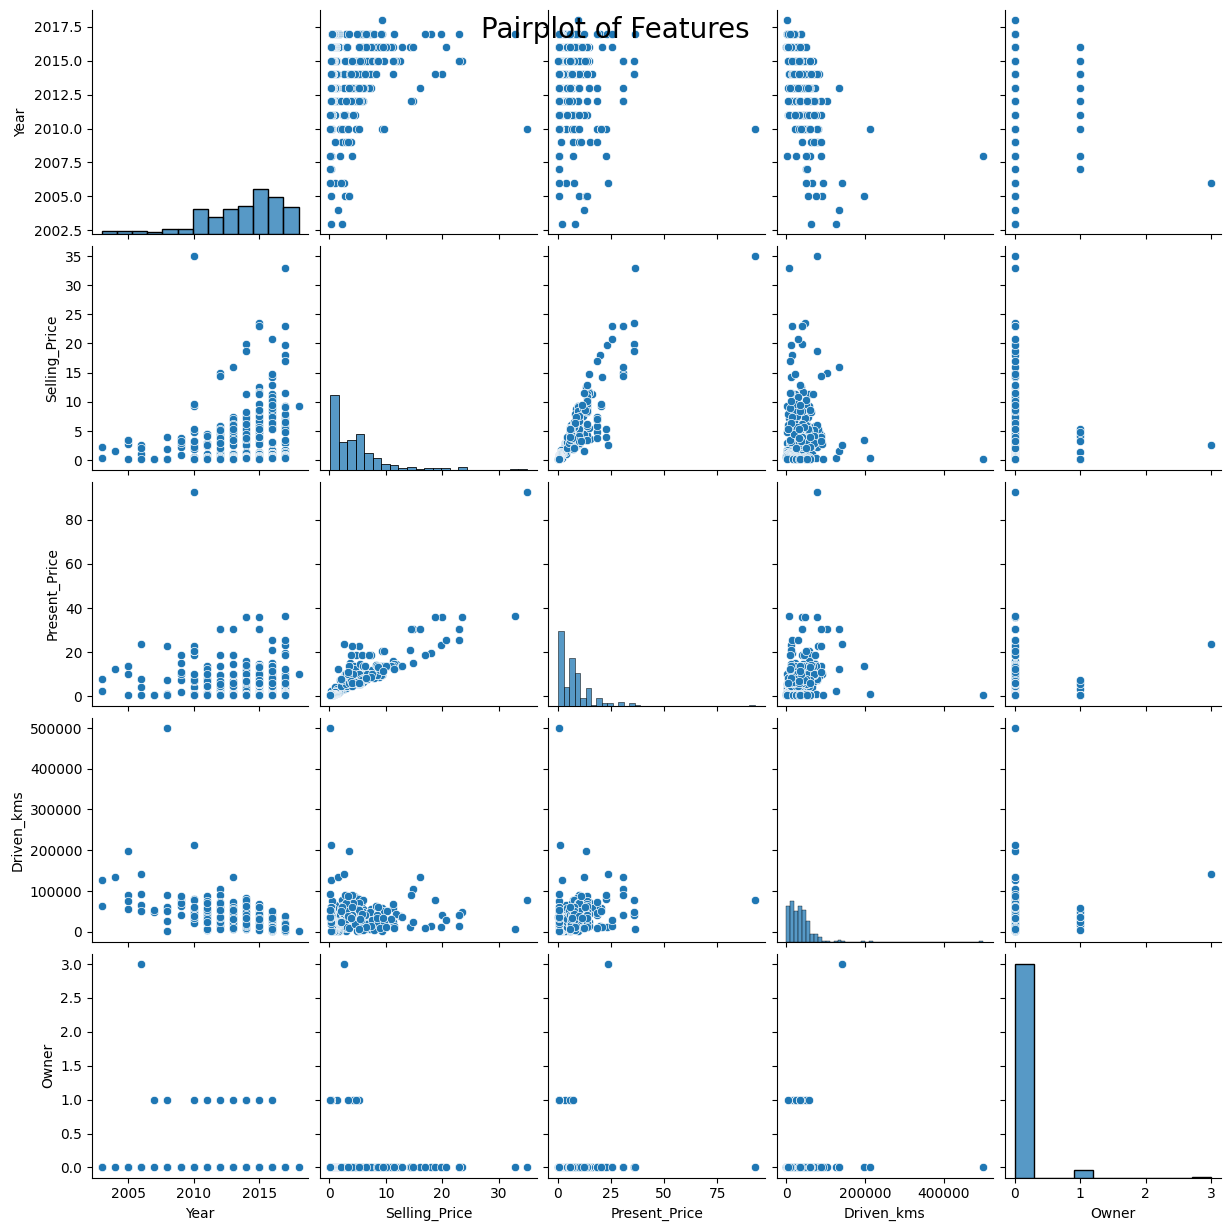

In [30]:
sns.pairplot(df)
plt.suptitle('Pairplot of Features', fontsize=20)
plt.show()


In [22]:
y_pred = clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.6101344262295083
Mean Squared Error: 0.8263443475409831
Root Mean Squared Error: 0.9090348439641811
R-squared: 0.9641274851604863


In [24]:
test_data = {
    'Year': [2016],
    'Present_Price': [7.5],
    'Driven_kms': [30000],
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual'],
    'Owner': [0]}
test_df = pd.DataFrame(test_data)
predicted_price = clf.predict(test_df)
print(f'Predicted Selling Price: {predicted_price[0]}')

Predicted Selling Price: 5.488999999999997


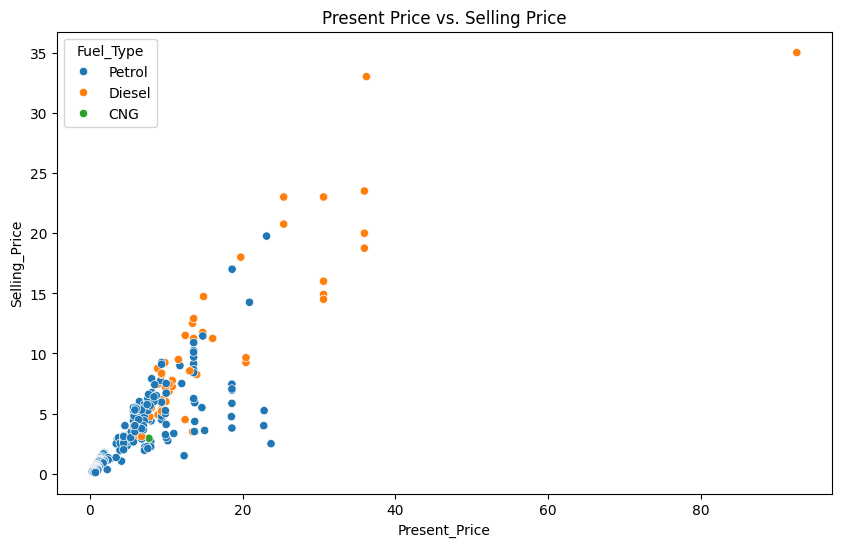

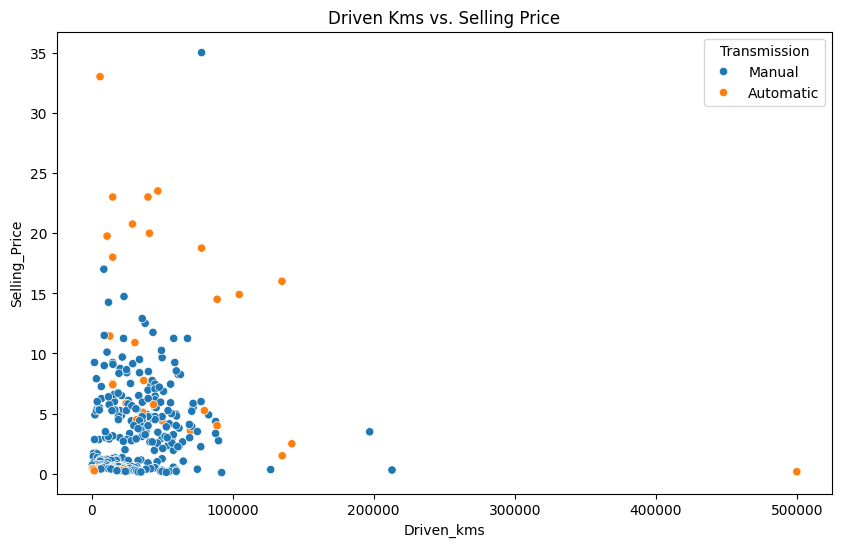

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type')
plt.title('Present Price vs. Selling Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df, hue='Transmission')
plt.title('Driven Kms vs. Selling Price')
plt.show()
